In [8]:
!apt-get update
!apt-get install -y wget curl unzip

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/univer

In [9]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get install -f

--2024-12-30 08:48:47--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 74.125.196.190, 74.125.196.93, 74.125.196.136, ...
Connecting to dl.google.com (dl.google.com)|74.125.196.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112770956 (108M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 107.55M   328MB/s    in 0.3s    

2024-12-30 08:48:47 (328 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [112770956/112770956]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (131.0.6778.204-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Package 

In [10]:
!google-chrome-stable --version

Google Chrome 131.0.6778.204 


In [11]:
import subprocess

# Run command to get Chrome version
chrome_version_output = subprocess.check_output(["google-chrome-stable", "--version"]).decode("utf-8")
# Extract version using regex
chrome_version = chrome_version_output.split()[2].split('.')[0]

print(f"Extracted Chrome Version: {chrome_version}")

Extracted Chrome Version: 131


In [12]:
!wget https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/linux64/chromedriver-linux64.zip

--2024-12-30 08:49:44--  https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.204/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.215.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945236 (9.5M) [application/zip]
Saving to: ‘chromedriver-linux64.zip’

chromedriver-linux6 100%[===================>]   9.48M  --.-KB/s    in 0.05s   

2024-12-30 08:49:44 (183 MB/s) - ‘chromedriver-linux64.zip’ saved [9945236/9945236]



In [13]:
!unzip chromedriver-linux64.zip

Archive:  chromedriver-linux64.zip
  inflating: chromedriver-linux64/LICENSE.chromedriver  
  inflating: chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: chromedriver-linux64/chromedriver  


In [14]:
!chmod +x /content/chromedriver-linux64/chromedriver

In [15]:
!pip install selenium

In [21]:
import os
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up Chrome options for headless mode (no GUI)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode (without UI)
chrome_options.add_argument("--no-sandbox")  # Disable sandboxing
chrome_options.add_argument("--disable-dev-shm-usage")  # Disable /dev/shm usage (avoids crashes)

# Path to ChromeDriver (adjust this based on your system)
chrome_driver_path = '/content/chromedriver-linux64/chromedriver'  # Update with the correct path
if not os.path.exists(chrome_driver_path):
    raise FileNotFoundError(f"ChromeDriver not found at {chrome_driver_path}")

# Set up the Service object for ChromeDriver
service = Service(chrome_driver_path)

# Initialize the WebDriver with the Service object and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Ensure the file path is correct for the local HTML file (using file:// format)
file_path = '/content/WEATHER.HTML'  # Ensure this is a valid file path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"HTML file not found at {file_path}")

driver.get(f"file://{os.path.abspath(file_path)}")  # Use the absolute path

# Wait for the elements to be visible (adjust timeout as needed)
wait = WebDriverWait(driver, 10)  # Wait up to 10 seconds

try:
    # Find input elements and ensure they are visible
    a_input = wait.until(EC.presence_of_element_located((By.ID, "a")))
    b_input = wait.until(EC.presence_of_element_located((By.ID, "b")))
    c_input = wait.until(EC.presence_of_element_located((By.ID, "c")))
    t_input = wait.until(EC.presence_of_element_located((By.ID, "t")))

    # Locate the calculate button
    calculate_button = wait.until(EC.presence_of_element_located((By.XPATH, "//button[@type='button']")))

    # Send test data
    a_input.clear()
    a_input.send_keys("1")
    b_input.clear()
    b_input.send_keys("2")
    c_input.clear()
    c_input.send_keys("3")
    t_input.clear()
    t_input.send_keys("4")

    # Trigger the calculation
    calculate_button.click()

    # Wait for the output to be updated
    output_element = wait.until(EC.presence_of_element_located((By.ID, "output")))

    # Retrieve and print the result
    output = output_element.text
    print("Output:", output)  # Example: Output: Temperature: 14.0°C

except Exception as e:
    print("Error:", e)

finally:
    # Close the driver after testing
    driver.quit()


Output: Temperature: 27°C


Navigating to the HTML file...
Waiting for input fields to load...
Filling input fields with values...
Input values confirmed:
a1: 3
b1: 9
c1: 6
a2: 2
b2: 10
c2: 2
a3: -1
b3: 3
c3: -9
Clicking the plot button...
Waiting for the chart to render...
Screenshot saved at: /content/graph_screenshot.png


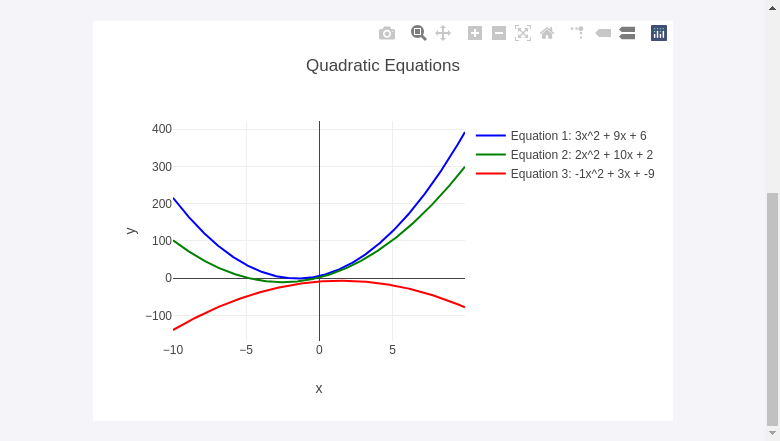

Test completed successfully.
Closing the driver...


In [25]:
import os
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image, display  # For displaying images inline

# Set up Chrome options for headless mode (no GUI)
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Path to ChromeDriver (adjust based on your system)
chrome_driver_path = '/content/chromedriver-linux64/chromedriver'
if not os.path.exists(chrome_driver_path):
    raise FileNotFoundError(f"ChromeDriver not found at: {chrome_driver_path}")

# Set up the Service object for ChromeDriver
service = Service(chrome_driver_path)

# Initialize WebDriver with Service object and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Ensure the file path is correct for the local HTML file (using file:// format)
file_path = '/content/final2.html'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"HTML file not found at: {file_path}")

try:
    print("Navigating to the HTML file...")
    driver.get(f"file://{os.path.abspath(file_path)}")

    # Wait for elements to load
    wait = WebDriverWait(driver, 20)

    print("Waiting for input fields to load...")
    # Locate all input fields
    input_ids = ["a1", "b1", "c1", "a2", "b2", "c2", "a3", "b3", "c3"]
    inputs = {key: wait.until(EC.presence_of_element_located((By.ID, key))) for key in input_ids}

    # Locate the plot button
    plot_button = wait.until(EC.presence_of_element_located((By.XPATH, "//button[@onclick='plotGraph()']")))

    print("Filling input fields with values...")
    # Define test values for inputs
    test_values = {
        "a1": "3", "b1": "9", "c1": "6",
        "a2": "2", "b2": "10", "c2": "2",
        "a3": "-1", "b3": "3", "c3": "-9"
    }

    # Clear and set values in input fields
    for key, value in test_values.items():
        inputs[key].clear()
        inputs[key].send_keys(value)

    # Confirm values entered correctly
    print("Input values confirmed:")
    for key in test_values:
        print(f"{key}: {inputs[key].get_attribute('value')}")

    print("Clicking the plot button...")
    # Trigger the plot action
    plot_button.click()

    print("Waiting for the chart to render...")
    chart_element = wait.until(EC.presence_of_element_located((By.ID, "chart")))

    # Scroll to the chart to ensure it is in the viewport
    driver.execute_script("arguments[0].scrollIntoView();", chart_element)

    # Wait a bit more to ensure the chart is fully rendered
    time.sleep(2)

    # Take a screenshot of the chart area
    screenshot_path = "/content/graph_screenshot.png"
    driver.save_screenshot(screenshot_path)
    print(f"Screenshot saved at: {screenshot_path}")

    # Display the screenshot inline
    display(Image(filename=screenshot_path))

    print("Test completed successfully.")

except Exception as e:
    print("Error encountered:")
    import traceback
    traceback.print_exc()

finally:
    print("Closing the driver...")
    driver.quit()
